In [1]:
## COVID-19 Data Visualization Study

## Study done by Özgür Can Arıcan
## Accessed to the data set from "EU Open Data Portal"
## link to the data set: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#imported the required libraries

In [3]:
data = pd.read_excel(r"COVID-19-geographic-disbtribution-worldwide.xlsx")
data.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-28,28,7,2020,105,1,Afghanistan,AF,AFG,38041757.0,Asia,5.028685
1,2020-07-27,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187
2,2020-07-26,26,7,2020,121,13,Afghanistan,AF,AFG,38041757.0,Asia,4.484546
3,2020-07-25,25,7,2020,108,35,Afghanistan,AF,AFG,38041757.0,Asia,4.389913
4,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
5,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098
6,2020-07-22,22,7,2020,112,4,Afghanistan,AF,AFG,38041757.0,Asia,5.606997
7,2020-07-21,21,7,2020,140,5,Afghanistan,AF,AFG,38041757.0,Asia,5.864608
8,2020-07-20,20,7,2020,174,17,Afghanistan,AF,AFG,38041757.0,Asia,6.634814
9,2020-07-19,19,7,2020,12,17,Afghanistan,AF,AFG,38041757.0,Asia,6.910827


In [4]:
data.shape

(32641, 12)

In [5]:
#For cleaning the dataframe, rows that includes NA values are erased.

data.dropna(inplace = True)
data.shape

(29737, 12)

In [6]:
#Get the worldwide total cases

data["cases"].sum()

16452256

In [7]:
#Get the worldwide total deaths

data["deaths"].sum()

653639

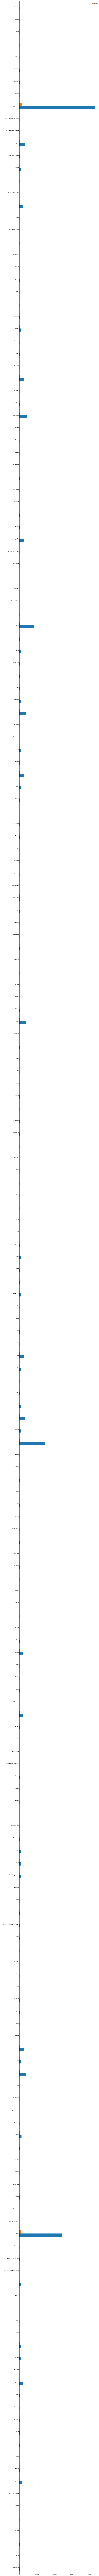

In [8]:
#Demonstrate the total cases and deaths by countries in horizontal bar plot

byCountrySum = data.groupby(["countriesAndTerritories"]).sum()[["cases", "deaths"]]
byCountrySum.plot.barh(figsize = (15, 500))

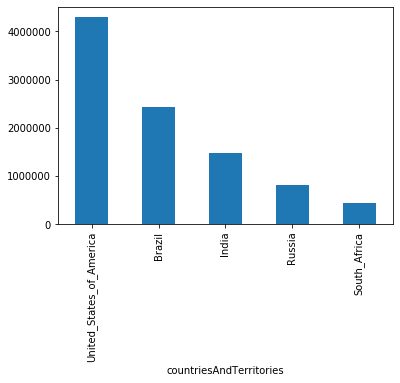

In [9]:
#Demonstrate the top 5 countries that have the most cases in bar plot

mostFiveCase = data.groupby(["countriesAndTerritories"]).sum()["cases"].sort_values(ascending = False).head(5)
mostFiveCase.plot.bar()

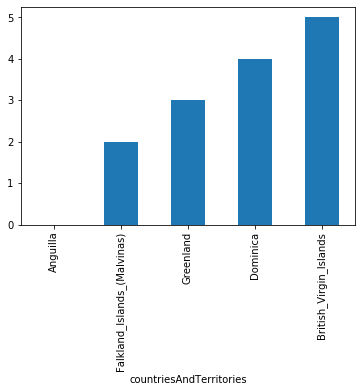

In [10]:
#Demonstrate the top 5 countries that have the least cases in bar plot

leastFiveCase = data.groupby(["countriesAndTerritories"]).sum()["cases"].sort_values(ascending = True).head(5)
leastFiveCase.plot.bar()

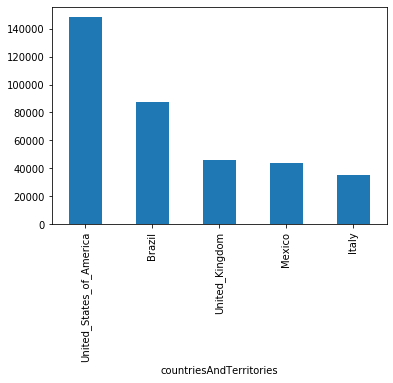

In [11]:
#Demonstrate the top 5 countries that have the most deaths in bar plot

mostFiveDeaths = data.groupby(["countriesAndTerritories"]).sum()["deaths"].sort_values(ascending = False).head(5)
mostFiveDeaths.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B4522FBC8>,
      dtype=object)

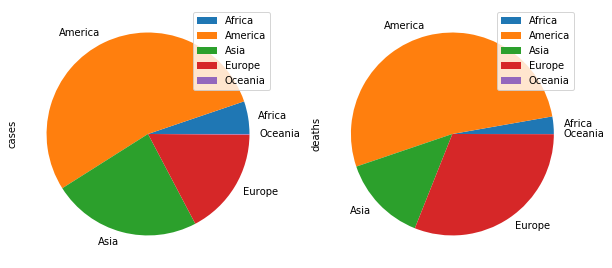

In [12]:
#Demonstrate the continental cases and deaths by pie charts

continentData = data.groupby(["continentExp"]).sum()[["cases", "deaths"]]
continentData.plot.pie(subplots = True, figsize = (10, 10))

#As it is shown in pie charts;
#There is no any significant changes in death and case ratios of America, Africa and Oceania
#Altough the deaths ratio is much greater than the cases ratio in Europe
#And the deaths ratio is much lower than the cases ratio in Asia

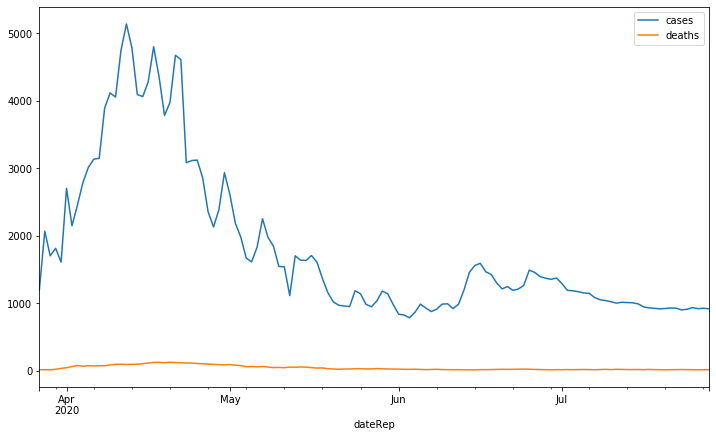

In [13]:
#Demonstrate the daily cases and deaths in Turkey in line graph

TurkeyData = data[data["countriesAndTerritories"] == "Turkey"].sort_values(by = "dateRep").set_index("dateRep")[["cases", "deaths"]]
TurkeyData.plot.line(figsize = (12, 7))

In [14]:
#Get the Turkey total cases

TurkeyData["cases"].sum()

224586

In [15]:
#Get the Turkey total deaths
TurkeyData["deaths"].sum()

5571